# Collection/Storage & Data Preprocessing

In [25]:
import requests
import pymongo
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")


# Connect to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client["cse482sports_database"]  # Replace "sports_database" with your database name

# API endpoint
player_season_stats_endpt = "https://api.sportsdata.io/v3/nfl/stats/json/PlayerSeasonStats/2023REG?key=cf2cf0bb18864d59a1b5d72af77b6883"

# Fetch data from the API
print("Fetching data from the API...")
response = requests.get(api_url)
data = response.json()

# Store data in MongoDB
collection = db["nfl_teamss"]  
collection.insert_many(data)

print("Data inserted successfully into MongoDB.")

Fetching data from the API...
Data inserted successfully into MongoDB.


In [8]:
player_season_stats_response = requests.request("GET", player_season_stats_endpt)

In [9]:
def get_data(response):
    if response.status_code == 200:
        sports_data = response.json()
        df = pd.DataFrame(sports_data)
        print("Columns/Attributes:", df.columns.tolist())
    else:
        print('Failed to retrieve data:', response.status_code, response.text)
    df = pd.DataFrame(sports_data)
    return df

In [10]:
get_data(player_season_stats_response)

Columns/Attributes: ['PlayerID', 'SeasonType', 'Season', 'Team', 'Number', 'Name', 'Position', 'PositionCategory', 'Activated', 'Played', 'Started', 'PassingAttempts', 'PassingCompletions', 'PassingYards', 'PassingCompletionPercentage', 'PassingYardsPerAttempt', 'PassingYardsPerCompletion', 'PassingTouchdowns', 'PassingInterceptions', 'PassingRating', 'PassingLong', 'PassingSacks', 'PassingSackYards', 'RushingAttempts', 'RushingYards', 'RushingYardsPerAttempt', 'RushingTouchdowns', 'RushingLong', 'ReceivingTargets', 'Receptions', 'ReceivingYards', 'ReceivingYardsPerReception', 'ReceivingTouchdowns', 'ReceivingLong', 'Fumbles', 'FumblesLost', 'PuntReturns', 'PuntReturnYards', 'PuntReturnYardsPerAttempt', 'PuntReturnTouchdowns', 'PuntReturnLong', 'KickReturns', 'KickReturnYards', 'KickReturnYardsPerAttempt', 'KickReturnTouchdowns', 'KickReturnLong', 'SoloTackles', 'AssistedTackles', 'TacklesForLoss', 'Sacks', 'SackYards', 'QuarterbackHits', 'PassesDefended', 'FumblesForced', 'FumblesReco

,PlayerID,SeasonType,Season,Team,Number,Name,Position,PositionCategory,Activated,Played,...,AverageDraftPosition,AverageDraftPositionPPR,TeamID,GlobalTeamID,FantasyPointsFantasyDraft,AverageDraftPositionRookie,AverageDraftPositionDynasty,AverageDraftPosition2QB,OffensiveFumbleRecoveryTouchdowns,ScoringDetails
0,549,1,2023,ARI,5,M.Prater,K,ST,17,17,...,None,None,1,1,0.0,None,None,None,None,"[{'GameKey': '202310135', 'SeasonType': 1, 'Pl..."
1,611,1,2023,CLE,15,J.Flacco,QB,OFF,5,5,...,None,None,8,8,98.4,None,None,None,None,"[{'GameKey': '202311332', 'SeasonType': 1, 'Pl..."
2,1694,1,2023,NYG,21,M.Crosby,K,ST,3,3,...,None,None,23,23,0.0,None,None,None,None,"[{'GameKey': '202311626', 'SeasonType': 1, 'Pl..."
3,2593,1,2023,NYJ,8,A.Rodgers,QB,OFF,1,1,...,None,None,24,24,0.0,None,None,None,None,[]
4,3061,1,2023,CHI,84,M.Lewis,TE,OFF,17,17,...,None,None,6,6,10.4,None,None,None,None,"[{'GameKey': '202311606', 'SeasonType': 1, 'Pl..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249,24872,1,2023,TEN,33,E.Garror,DB,DEF,12,12,...,None,None,34,34,-0.8,None,None,None,None,[]
2250,24875,1,2023,DET,83,D.Drummond,WR,OFF,1,1,...,None,None,11,11,0.0,None,None,None,None,[]
2251,24894,1,2023,MIN,81,L.Jackson,WR,OFF,3,3,...,None,None,20,20,0.0,None,None,None,None,[]
2252,24902,1,2023,DAL,17,B.Aubrey,K,ST,17,17,...,None,None,9,9,0.0,None,None,None,None,"[{'GameKey': '202310123', 'SeasonType': 1, 'Pl..."


In [12]:
def narrow_data(response):
    if response.status_code == 200:
        sports_data = response.json()
        selected_columns = [
            'PlayerID', 'Name', 'Position', 'Team', 
            'PassingAttempts', 'PassingCompletions', 'PassingYards', 'PassingTouchdowns', 'PassingInterceptions', 'PassingRating',
            'RushingAttempts', 'RushingYards', 'RushingTouchdowns',
            'ReceivingTargets', 'Receptions', 'ReceivingYards', 'ReceivingTouchdowns',
            'FantasyPoints', 'FantasyPointsPPR', 'FantasyPointsFanDuel', 'FantasyPointsDraftKings', 'FantasyPointsYahoo',
            'SoloTackles', 'AssistedTackles', 'TacklesForLoss', 'Sacks', 'Interceptions', 'FumblesForced', 'FumblesRecovered'
        ]
        df = pd.DataFrame(sports_data)
        df = df[selected_columns]
        df = df.dropna()
    else:
        print('Failed to retrieve data:', response.status_code, response.text)
        df = pd.DataFrame()  # Empty DataFrame
    return df

# Call the function for player data
player_season_stats_df = narrow_data(player_season_stats_response)


position_counts = player_season_stats_df['Position'].value_counts()

# Print frequency counts for each position
print("Position Frequencies:")
print(position_counts)

Position Frequencies:
WR     253
CB     231
LB     213
S      158
RB     158
TE     145
OT     120
OL     109
DT     109
QB     105
DL     101
DE      98
G       97
OLB     75
DB      57
C       51
K       41
P       38
LS      35
ILB     30
FB      15
NT       9
SS       5
FS       1
Name: Position, dtype: int64


In [15]:
# Creating separate datasets
wr_data = player_season_stats_df[player_season_stats_df['Position'] == 'WR']
cb_data = player_season_stats_df[player_season_stats_df['Position'] == 'CB']
lb_data = player_season_stats_df[player_season_stats_df['Position'] == 'LB']

# Feature Selection

In [17]:
# Get unique values for each column in wr_data
unique_values_wr = {column: wr_data[column].unique() for column in wr_data.columns}

# Print unique values for each column
print("Unique values for WR data:")
for column, values in unique_values_wr.items():
    print(f"{column}: {values}")
    
# Dropping columns with only 0 unique values
columns_to_drop = []
for col in wr_data.columns:
    if wr_data[col].nunique() == 1 and wr_data[col].unique()[0] == 0:
        columns_to_drop.append(col)

wr_data = wr_data.drop(columns=columns_to_drop)
wr_data

Unique values for WR data:
PlayerID: [ 7651 13227 13291 13870 14865 14871 14986 15076 15534 16141 16263 16389
 16470 16568 16597 16765 16775 16781 16790 16830 16837 16855 16866 16906
 17141 17218 17914 17960 17961 17986 18030 18047 18082 18187 18197 18422
 18880 18882 18883 18914 18926 18928 19017 19023 19043 19044 19064 19080
 19120 19172 19318 19514 19755 19800 19802 19815 19816 19844 19867 19897
 19922 19961 19976 20013 20038 20071 20077 20081 20145 20150 20398 20487
 20679 20788 20792 20816 20820 20873 20875 20876 20886 20924 20932 20939
 20943 20963 21005 21037 21042 21045 21071 21072 21077 21115 21138 21142
 21163 21169 21263 21400 21448 21473 21601 21675 21679 21685 21686 21687
 21690 21692 21697 21714 21717 21721 21723 21724 21725 21730 21734 21735
 21739 21743 21744 21747 21750 21752 21754 21756 21760 21957 21961 22234
 22339 22345 22415 22417 22488 22564 22565 22566 22569 22572 22575 22587
 22589 22590 22591 22592 22594 22595 22596 22597 22598 22600 22602 22604
 22613 22614 2

,PlayerID,Name,Position,Team,PassingAttempts,PassingCompletions,PassingYards,PassingTouchdowns,PassingInterceptions,PassingRating,...,ReceivingTouchdowns,FantasyPoints,FantasyPointsPPR,FantasyPointsFanDuel,FantasyPointsDraftKings,FantasyPointsYahoo,SoloTackles,AssistedTackles,FumblesForced,FumblesRecovered
8,7651,M.Slater,WR,NE,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.3,0.7,0.0,0.0
38,13227,R.Cobb,WR,NYJ,0.0,0.0,0.0,0.0,0.0,0.0,...,0.7,7.8,13.7,11.6,13.7,11.6,0.0,0.0,0.0,0.0
39,13291,J.Jones,WR,PHI,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,20.5,29.4,25.0,29.4,25.0,0.0,0.0,0.0,0.0
50,13870,M.Jones Jr.,WR,DET,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,4.2,2.6,4.9,2.6,0.0,0.0,0.0,0.0
79,14865,M.Goodwin,WR,CLE,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.5,11.3,7.8,11.3,7.8,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229,24749,S.Jackson,WR,CIN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.0,0.0,0.0
2232,24755,E.Cooks,WR,JAX,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.5,4.4,3.5,4.4,3.5,0.0,0.0,0.0,0.0
2239,24812,Z.Malone,WR,ATL,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2250,24875,D.Drummond,WR,DET,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Get unique values for each column in cb_data
unique_values_cb = {column: cb_data[column].unique() for column in cb_data.columns}

# Print unique values for each column
print("Unique values for CB data:")
for column, values in unique_values_cb.items():
    print(f"{column}: {values}")
    
# Dropping columns with only 0 unique values
columns_to_drop = []
for col in cb_data.columns:
    if cb_data[col].nunique() == 1 and cb_data[col].unique()[0] == 0:
        columns_to_drop.append(col)

cb_data = cb_data.drop(columns=columns_to_drop)
cb_data

Unique values for CB data:
PlayerID: [13415 13761 14340 14469 15127 16283 16353 16779 16811 16859 17294 17337
 17919 17950 17953 17976 17992 18013 18106 18135 18316 18658 18905 18917
 18918 18924 18929 18953 18972 18975 18982 18984 18986 19062 19287 19375
 19501 19560 19830 19839 19847 19868 19870 19892 19901 19928 19949 19951
 19953 19963 19994 20028 20050 20066 20080 20102 20157 20178 20204 20217
 20281 20366 20395 20434 20460 20570 20584 20721 20754 20791 20822 20840
 20861 20887 20888 20903 20938 20986 21001 21021 21036 21050 21064 21116
 21192 21210 21216 21239 21463 21934 22044 22046 22048 22049 22050 22051
 22052 22055 22056 22060 22068 22072 22075 22076 22079 22084 22086 22089
 22141 22171 22190 22202 22258 22692 22694 22704 22726 22731 22733 22735
 22739 22763 22782 22786 22787 22807 22808 22829 22848 22877 22894 22921
 22923 22929 22983 23011 23022 23059 23274 23282 23291 23320 23322 23328
 23334 23337 23338 23365 23367 23417 23419 23420 23423 23425 23426 23427
 23428 23431 2

,PlayerID,Name,Position,Team,RushingAttempts,RushingYards,ReceivingTargets,Receptions,ReceivingYards,FantasyPoints,...,FantasyPointsFanDuel,FantasyPointsDraftKings,FantasyPointsYahoo,SoloTackles,AssistedTackles,TacklesForLoss,Sacks,Interceptions,FumblesForced,FumblesRecovered
42,13415,P.Peterson,CB,PIT,0.0,0.0,0.0,0.0,0.0,44.4,...,0.0,0.0,0.0,27.5,5.2,0.0,0.0,1.3,0.0,0.0
47,13761,S.Gilmore,CB,DAL,0.0,0.0,0.0,0.0,0.0,67.1,...,0.0,0.0,0.0,43.6,11.3,0.0,0.0,1.3,0.7,0.0
60,14340,J.Norman,CB,BUF,0.0,0.0,0.0,0.0,0.0,0.7,...,0.0,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0
65,14469,J.Bethel,CB,MIA,0.0,0.0,0.0,0.0,0.0,13.3,...,0.0,0.0,0.0,5.9,2.6,1.3,0.3,0.0,0.0,0.0
98,15127,D.Slay,CB,PHI,0.0,0.0,0.0,0.0,0.0,65.0,...,0.0,0.0,0.0,38.8,5.9,0.7,0.0,1.3,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,24770,N.Whiteside,CB,WAS,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2243,24854,S.Gilmore,CB,DET,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2244,24856,A.Kendall,CB,TEN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2247,24867,E.Boye-Doe,CB,KC,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Get unique values for each column in lb_data
unique_values_lb = {column: lb_data[column].unique() for column in lb_data.columns}

# Print unique values for each column
print("Unique values for LB data:")
for column, values in unique_values_lb.items():
    print(f"{column}: {values}")
    
# Dropping columns with only 0 unique values
columns_to_drop = []
for col in lb_data.columns:
    if lb_data[col].nunique() == 1 and lb_data[col].unique()[0] == 0:
        columns_to_drop.append(col)

lb_data = lb_data.drop(columns=columns_to_drop)
lb_data

Unique values for LB data:
PlayerID: [12247 12787 13022 13810 14128 14375 14534 16093 16496 16786 16799 16806
 16809 16819 16845 16885 16929 17145 17925 17926 17983 18015 18037 18052
 18064 18124 18130 18162 18559 18909 18916 18945 18956 18964 19009 19037
 19049 19273 19310 19458 19496 19538 19832 19836 19838 19852 19859 19872
 19882 19891 19902 19904 19944 20007 20020 20023 20024 20245 20411 20498
 20646 20657 20724 20749 20767 20778 20862 20915 20959 20968 20971 20981
 20994 21011 21025 21054 21108 21109 21117 21118 21120 21125 21207 21218
 21306 21354 21379 21449 21478 21490 21543 21882 21887 21889 21897 21898
 21907 21911 21913 21932 21974 21984 21985 21989 21991 21994 21996 21999
 22003 22005 22017 22199 22321 22334 22352 22377 22695 22696 22699 22710
 22714 22720 22749 22753 22759 22761 22767 22784 22785 22804 22811 22855
 22861 22864 22865 22872 22904 22905 22926 22942 22956 23003 23017 23072
 23261 23283 23296 23309 23340 23344 23348 23379 23381 23382 23392 23437
 23438 23439 2

,PlayerID,Name,Position,Team,PassingAttempts,PassingCompletions,PassingYards,PassingRating,RushingAttempts,RushingYards,...,FantasyPointsFanDuel,FantasyPointsDraftKings,FantasyPointsYahoo,SoloTackles,AssistedTackles,TacklesForLoss,Sacks,Interceptions,FumblesForced,FumblesRecovered
25,12247,J.Pierre-Paul,LB,MIA,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.7,0.7,0.0,0.0,0.0,0.0,0.0
29,12787,N.Bellore,LB,SEA,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.7,0.7,0.0,0.0,0.0,0.0,0.0
34,13022,V.Miller,LB,BUF,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.3,0.7,0.0,0.0,0.0,0.0,0.0
49,13810,D.Davis,LB,NO,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,59.8,38.0,7.8,4.2,0.0,0.7,0.7
57,14128,M.Ingram,LB,MIA,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.9,0.7,0.7,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,24644,B.VanSumeren,LB,PHI,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,3.9,0.0,0.0,0.0,0.0,0.0
2227,24728,P.O'Connell,LB,SEA,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2235,24782,T.Nowaske,LB,ARI,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0
2236,24799,C.Cherelus,LB,CAR,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Visualization

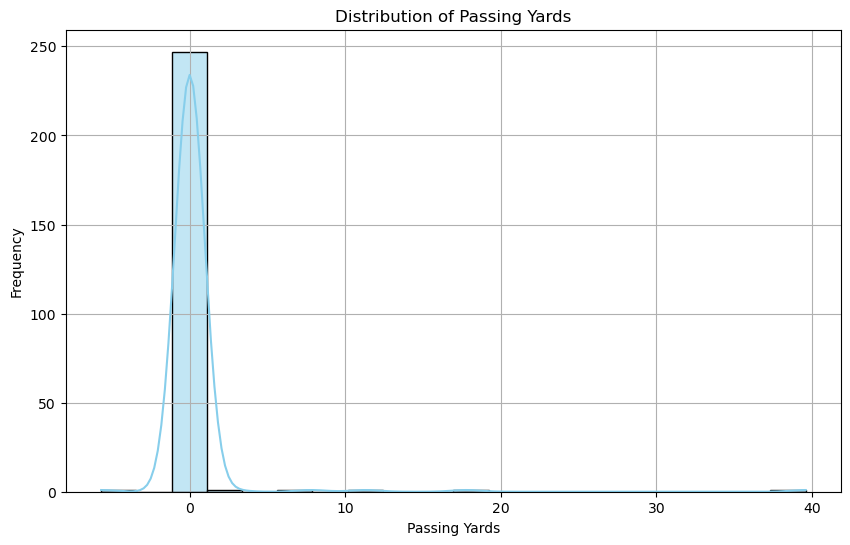

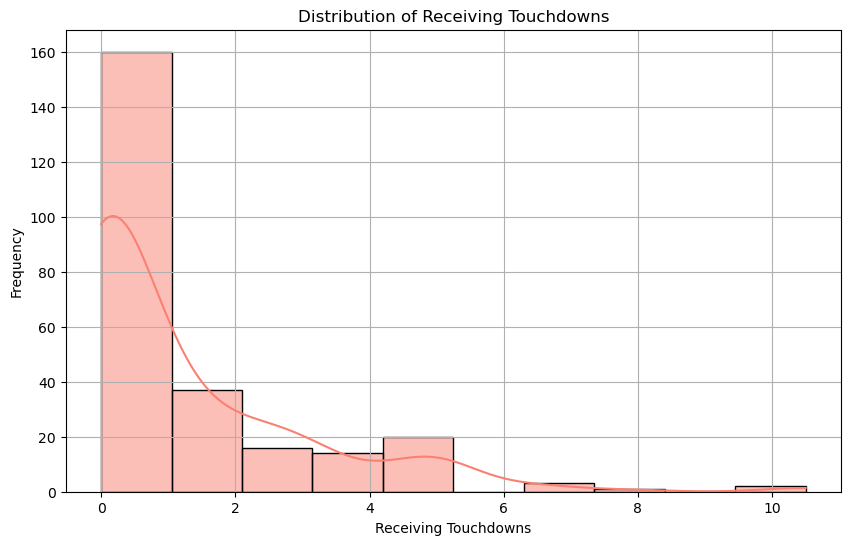

In [26]:
# Selecting relevant variables
wr_data_subset = wr_data[['PassingYards', 'ReceivingTouchdowns']]

# Dropping rows with missing values
wr_data_subset.dropna(inplace=True)

# Plotting distribution of PassingYards
plt.figure(figsize=(10, 6))
sns.histplot(data = wr_data_subset, x='PassingYards', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Passing Yards')
plt.xlabel('Passing Yards')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting distribution of ReceivingTouchdowns
plt.figure(figsize=(10, 6))
sns.histplot(data = wr_data_subset, x='ReceivingTouchdowns', bins=10, kde=True, color='salmon')
plt.title('Distribution of Receiving Touchdowns')
plt.xlabel('Receiving Touchdowns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


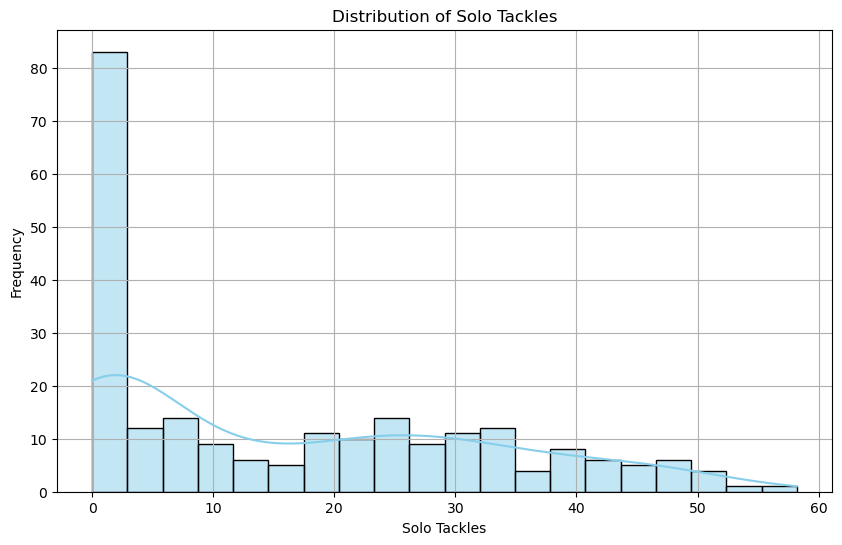

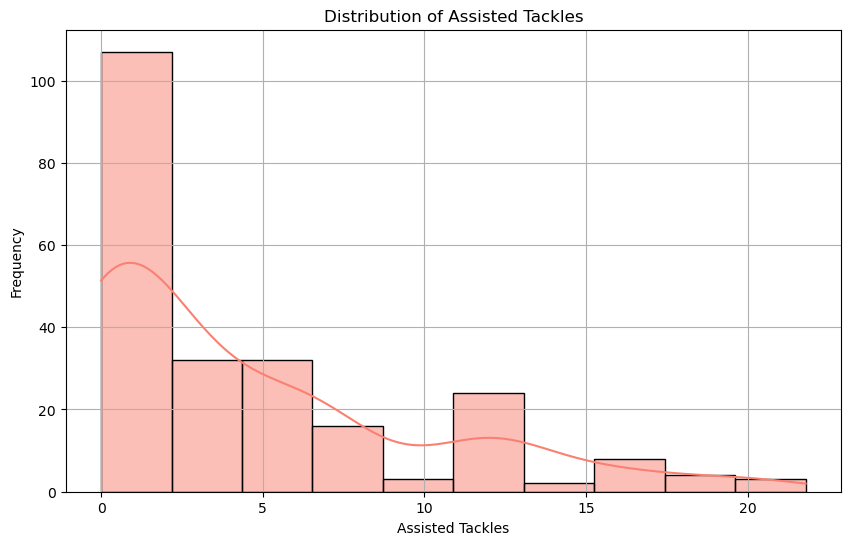

In [33]:
# Selecting relevant variables
cb_data_subset = cb_data[['SoloTackles', 'AssistedTackles']]

# Dropping rows with missing values
cb_data_subset.dropna(inplace=True)

# Plotting distribution of Solo Tackles
plt.figure(figsize=(10, 6))
sns.histplot(data = cb_data_subset, x='SoloTackles', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Solo Tackles')
plt.xlabel('Solo Tackles')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting distribution of Assisted Tackles
plt.figure(figsize=(10, 6))
sns.histplot(data = cb_data_subset, x='AssistedTackles', bins=10, kde=True, color='salmon')
plt.title('Distribution of Assisted Tackles')
plt.xlabel('Assisted Tackles')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

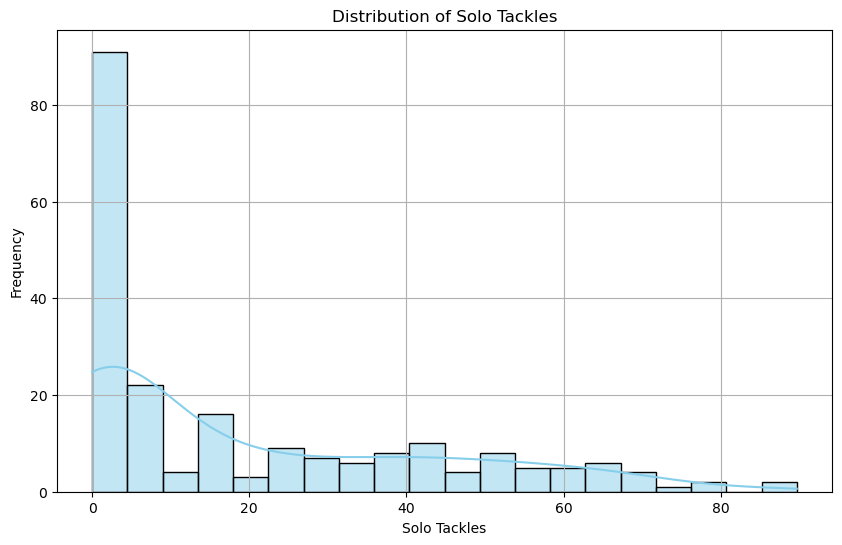

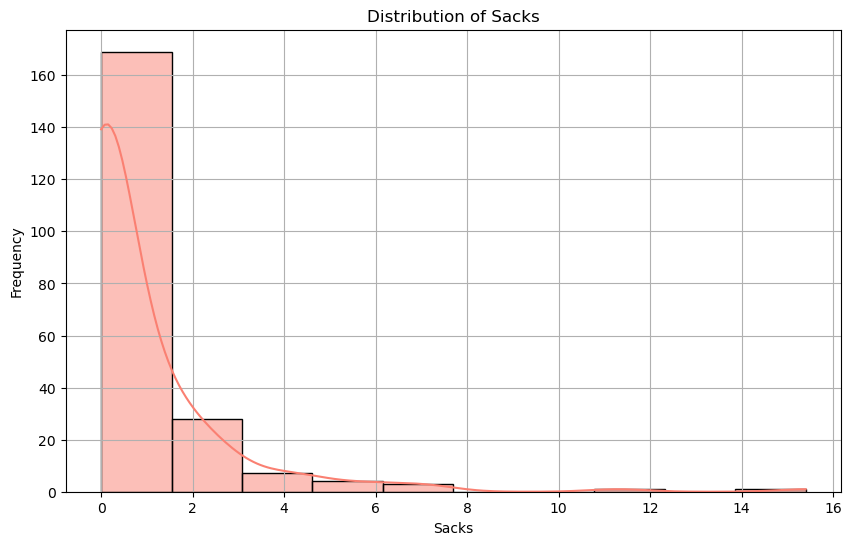

In [34]:
# Selecting relevant variables
lb_data_subset = lb_data[['SoloTackles', 'Sacks']]

# Dropping rows with missing values
lb_data_subset.dropna(inplace=True)

# Plotting distribution of Solo Tackles
plt.figure(figsize=(10, 6))
sns.histplot(data = lb_data_subset, x='SoloTackles', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Solo Tackles')
plt.xlabel('Solo Tackles')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting distribution of Assisted Tackles
plt.figure(figsize=(10, 6))
sns.histplot(data = lb_data_subset, x='Sacks', bins=10, kde=True, color='salmon')
plt.title('Distribution of Sacks')
plt.xlabel('Sacks')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()